# Trabalho Final — Segmentação de Clientes (Clustering)

EDA → Pré-processamento → Modelagem (K-Means, DBSCAN) → Avaliação → EDA por cluster.

## 1) Importar bibliotecas

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use('ggplot')
sns.set_palette('Set2')

## 2) Carregar dados

In [41]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

print('Train shape:', train.shape)
print('Test shape:', test.shape)
train.head()

Train shape: (8068, 11)
Test shape: (2627, 10)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


### 2.1) EDA — visão geral

In [42]:
train.info()
display(train.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,8068.000000,8068,7928,8068.000000,7990,7944,7239.000000,8068,7733.000000,7992,8068
unique,NaN,2,2,NaN,2,9,NaN,3,NaN,7,4
top,NaN,Male,Yes,NaN,Yes,Artist,NaN,Low,NaN,Cat_6,D
freq,NaN,4417,4643,NaN,4968,2516,NaN,4878,NaN,5238,2268
mean,463479.214551,NaN,NaN,43.466906,NaN,NaN,2.641663,NaN,2.850123,NaN,NaN
std,2595.381232,NaN,NaN,16.711696,NaN,NaN,3.406763,NaN,1.531413,NaN,NaN
min,458982.000000,NaN,NaN,18.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN
25%,461240.750000,NaN,NaN,30.000000,NaN,NaN,0.000000,NaN,2.000000,NaN,NaN
50%,463472.500000,NaN,NaN,40.000000,NaN,NaN,1.000000,NaN,3.000000,NaN,NaN
75%,465744.250000,NaN,NaN,53.000000,NaN,NaN,4.000000,NaN,4.000000,NaN,NaN


### 2.2) EDA — valores ausentes

In [ ]:
#!pip install missingno

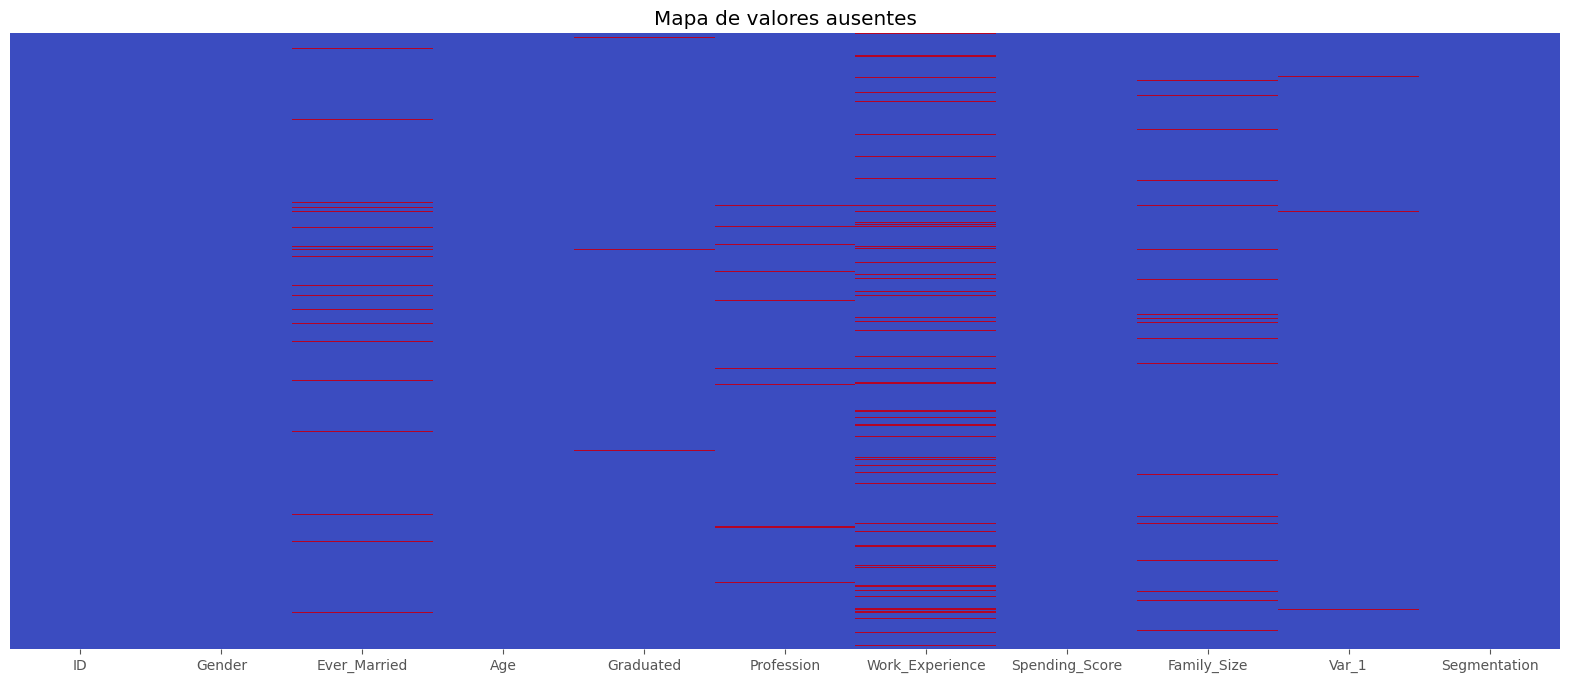

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

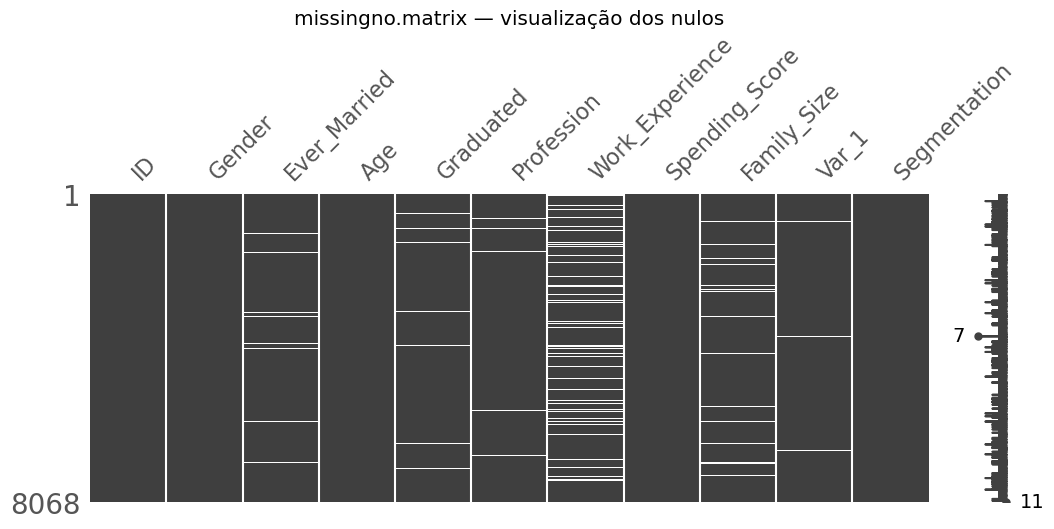

In [43]:
plt.figure(figsize=(20,8))
sns.heatmap(train.isnull(), cbar=False, cmap='coolwarm', yticklabels=False)
plt.title('Mapa de valores ausentes')
plt.show()
display(train.isnull().sum())

try:
    import missingno as msno
    msno.matrix(train, figsize=(12,4))
    plt.title('missingno.matrix — visualização dos nulos')
    plt.show()
except Exception as e:
    print('missingno não disponível:', e)


### 2.3) Distribuição de Segmentation (referência)

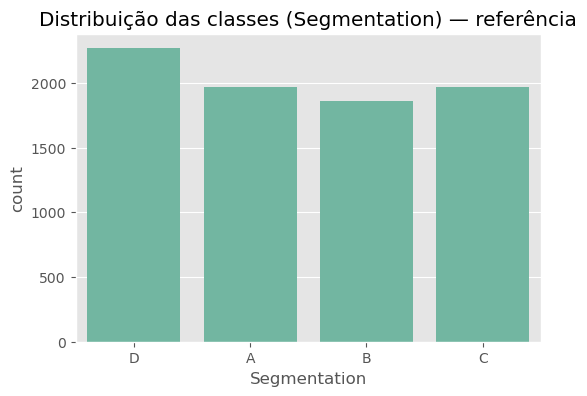

Segmentation
D    0.281111
A    0.244422
C    0.244175
B    0.230293
Name: proportion, dtype: float64

In [44]:
plt.figure(figsize=(6,4))
sns.countplot(data=train, x='Segmentation')
plt.title('Distribuição das classes (Segmentation) — referência')
plt.show()
display(train['Segmentation'].value_counts(normalize=True))

### 2.4) Variáveis numéricas

<Figure size 1200x400 with 0 Axes>

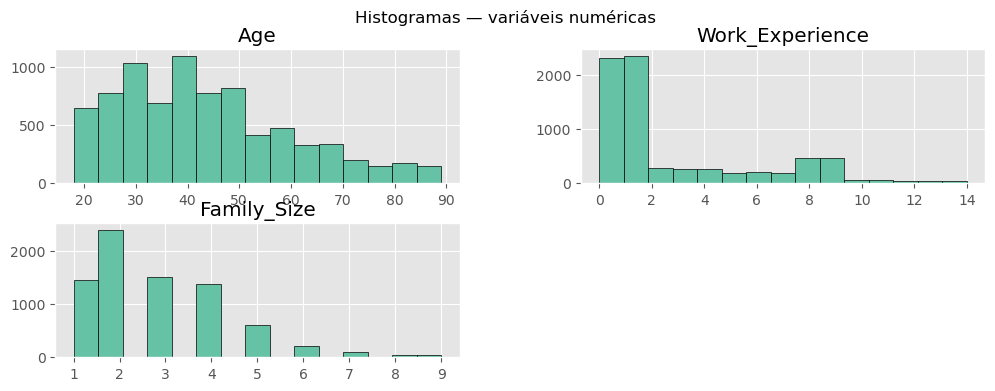

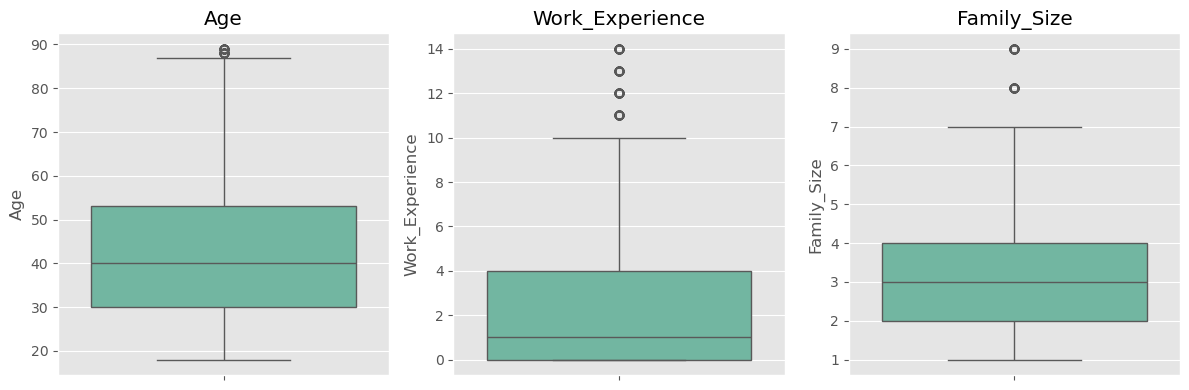

In [45]:
num_cols = ['Age','Work_Experience','Family_Size']

plt.figure(figsize=(12,4))
train[num_cols].hist(bins=15, edgecolor='black', figsize=(12,4))
plt.suptitle('Histogramas — variáveis numéricas')
plt.show()

plt.figure(figsize=(12,4))
for i,col in enumerate(num_cols):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=train[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### 2.5) Variáveis categóricas

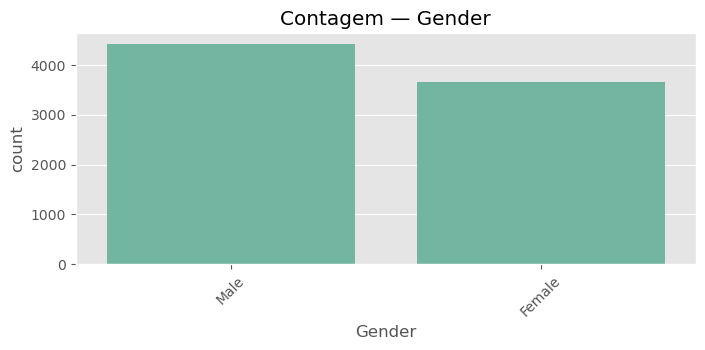

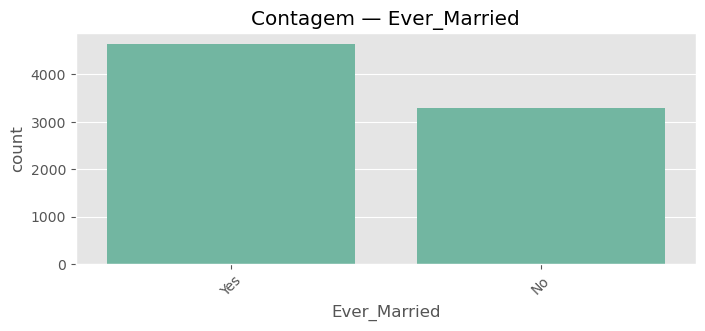

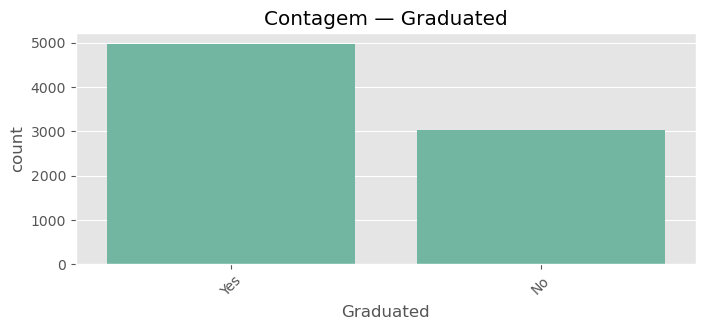

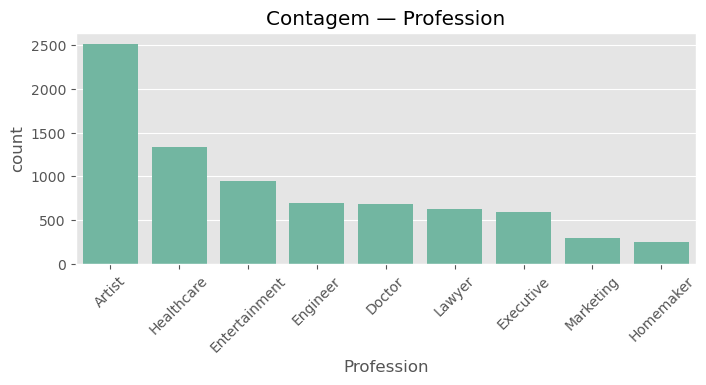

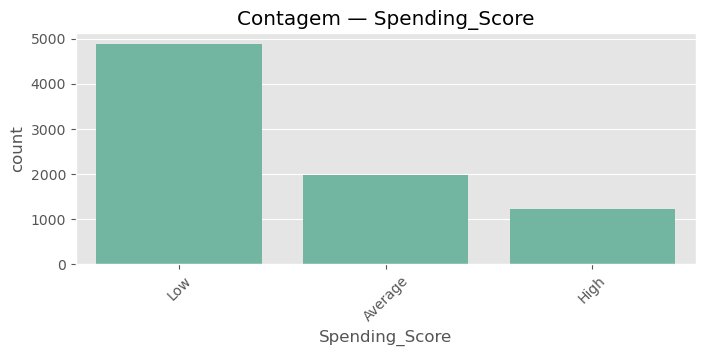

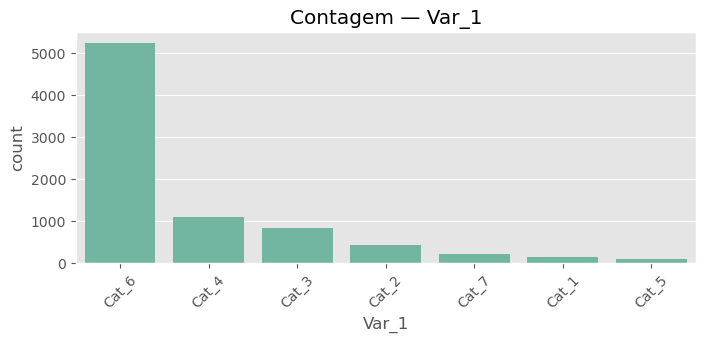

In [46]:
cat_cols = ['Gender','Ever_Married','Graduated','Profession','Spending_Score','Var_1']

for col in cat_cols:
    plt.figure(figsize=(8,3))
    sns.countplot(data=train, x=col, order=train[col].value_counts().index)
    plt.title(f'Contagem — {col}')
    plt.xticks(rotation=45)
    
    plt.show()

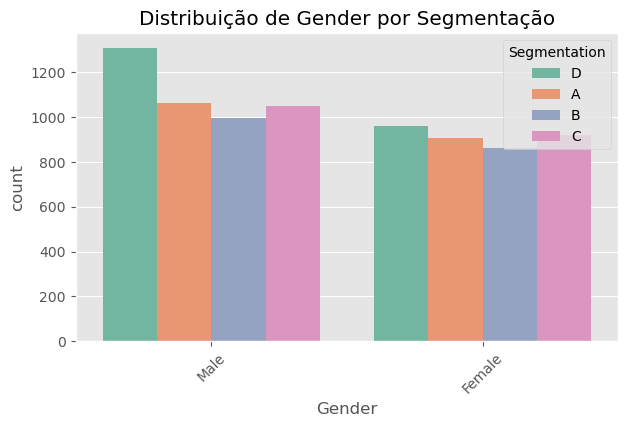

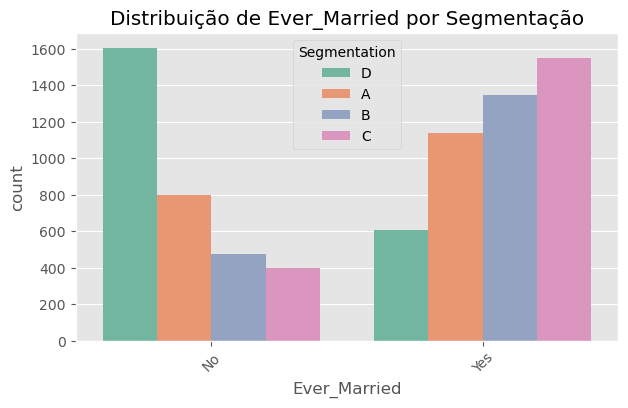

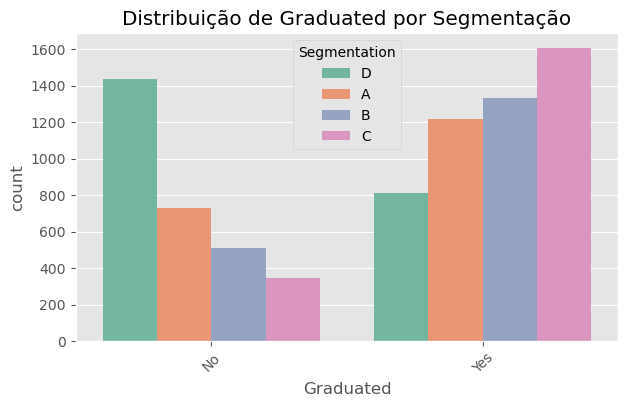

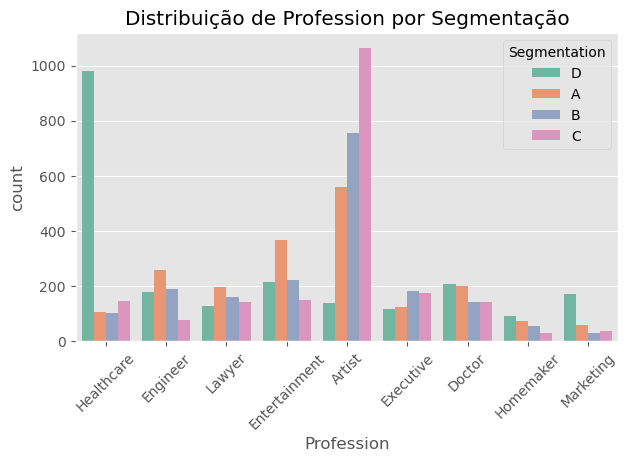

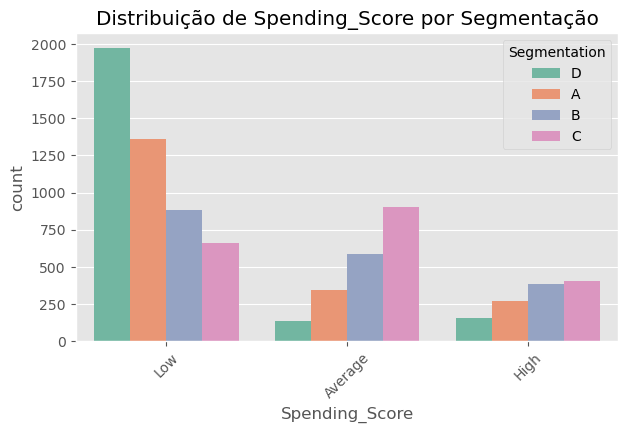

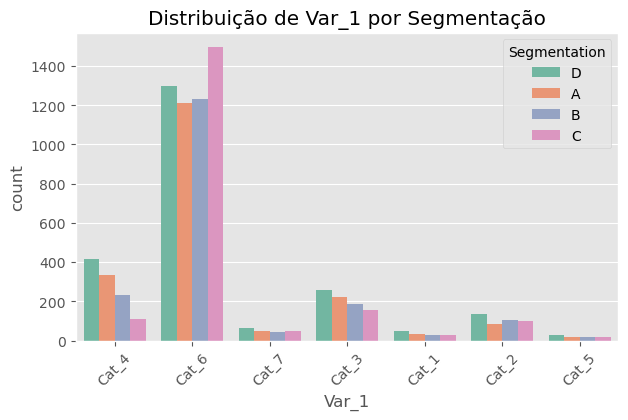

In [47]:
cat_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']

for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(data=train, x=col, hue="Segmentation")
    plt.title(f"Distribuição de {col} por Segmentação")
    plt.xticks(rotation=45)
    plt.show()

## 3) Pré-processamento

In [48]:
df = train.copy()

seg_true = df['Segmentation'].copy()
df.drop(columns=['ID','Segmentation'], inplace=True)
print('Shape para clustering:', df.shape)

Shape para clustering: (8068, 9)


### 3.1) Tratar valores ausentes

In [49]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

for c in num_cols:
    df[c].fillna(df[c].median(), inplace=True)
for c in cat_cols:
    df[c].fillna(df[c].mode()[0], inplace=True)
display(df.isnull().sum())

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

### 3.2) Codificação

In [50]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
bin_cols = ['Gender','Ever_Married','Graduated']
le = LabelEncoder()

for c in bin_cols:
    if c in df_encoded.columns:
        df_encoded[c] = le.fit_transform(df_encoded[c])
df_encoded = pd.get_dummies(df_encoded, columns=['Profession','Spending_Score','Var_1'], drop_first=True)

print('Shape após encoding:', df_encoded.shape)
df_encoded.head()

Shape após encoding: (8068, 22)


,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,...,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,0,22,0,1.0,4.0,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
1,0,1,38,1,1.0,3.0,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,0,1,67,1,1.0,1.0,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
3,1,1,67,1,0.0,2.0,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False
4,0,1,40,1,1.0,6.0,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False


### 3.3) Padronização (StandardScaler)

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)
X_scaled_df = pd.DataFrame(X_scaled, columns=df_encoded.columns)
X_scaled_df.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,...,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,0.909164,-1.206653,-1.284623,-1.29219,-0.451136,0.762698,-0.305328,-0.307988,-0.365110,-0.283193,...,-0.289276,-0.193782,-0.421268,0.808676,-0.23493,-0.336811,2.531528,-0.103187,-1.389085,-0.160657
1,-1.099912,0.828738,-0.327151,0.77388,-0.451136,0.095802,-0.305328,3.246876,-0.365110,-0.283193,...,-0.289276,-0.193782,-0.421268,-1.236590,-0.23493,-0.336811,2.531528,-0.103187,-1.389085,-0.160657
2,-1.099912,0.828738,1.408268,0.77388,-0.451136,-1.237990,-0.305328,3.246876,-0.365110,-0.283193,...,-0.289276,-0.193782,-0.421268,0.808676,-0.23493,-0.336811,-0.395018,-0.103187,0.719898,-0.160657
3,0.909164,0.828738,1.408268,0.77388,-0.757410,-0.571094,-0.305328,-0.307988,-0.365110,-0.283193,...,3.456912,-0.193782,2.373788,-1.236590,-0.23493,-0.336811,-0.395018,-0.103187,0.719898,-0.160657
4,-1.099912,0.828738,-0.207467,0.77388,-0.451136,2.096491,-0.305328,-0.307988,2.738901,-0.283193,...,-0.289276,-0.193782,2.373788,-1.236590,-0.23493,-0.336811,-0.395018,-0.103187,0.719898,-0.160657


## 4) PCA e Kernel PCA

Explained variance ratio (PCA): [0.146 0.086]


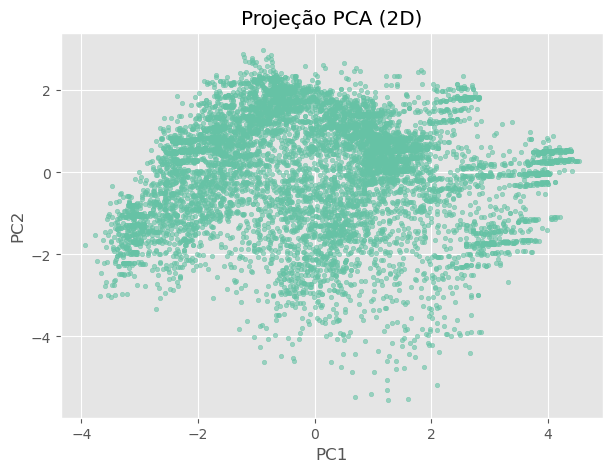

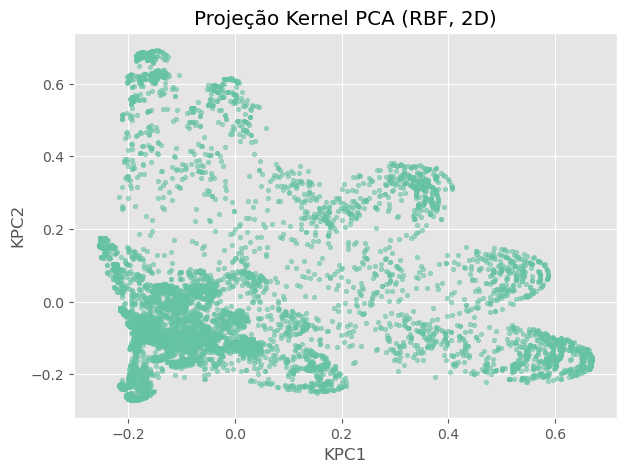

In [52]:
from sklearn.decomposition import PCA, KernelPCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print('Explained variance ratio (PCA):', pca.explained_variance_ratio_.round(3))

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.6, s=10)
plt.title('Projeção PCA (2D)'); plt.xlabel('PC1'); plt.ylabel('PC2')
plt.show()

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.1, random_state=42)
X_kpca = kpca.fit_transform(X_scaled)
plt.figure(figsize=(7,5))
plt.scatter(X_kpca[:,0], X_kpca[:,1], alpha=0.6, s=10)
plt.title('Projeção Kernel PCA (RBF, 2D)'); plt.xlabel('KPC1'); plt.ylabel('KPC2')
plt.show()

## 5) K-Means

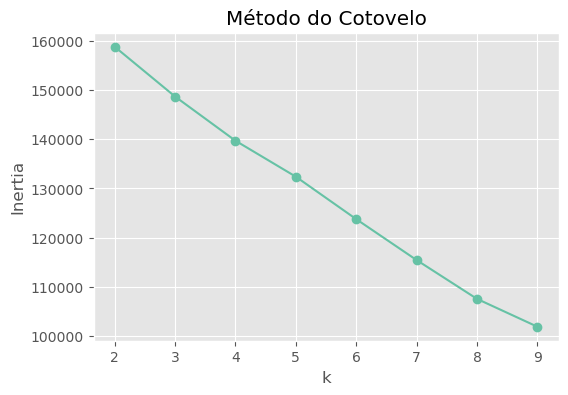

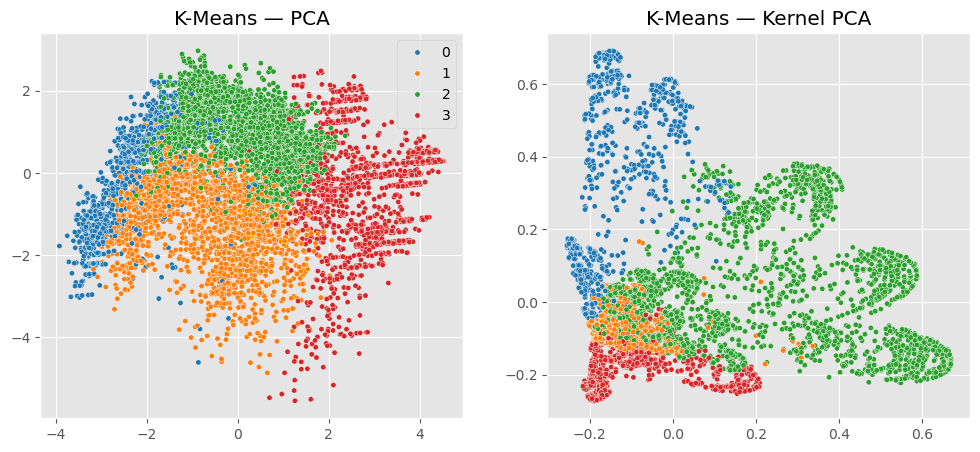

In [53]:
from sklearn.cluster import KMeans

inertia = []
K = range(2,10)

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'o-'); plt.xlabel('k'); plt.ylabel('Inertia'); plt.title('Método do Cotovelo')
plt.show()

k_final = 4
kmeans = KMeans(n_clusters=k_final, random_state=42, n_init=10)
labels_km = kmeans.fit_predict(X_scaled)
train['Cluster_KMeans'] = labels_km

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_km, palette='tab10', s=15)
plt.title('K-Means — PCA')
plt.subplot(1,2,2)
sns.scatterplot(x=X_kpca[:,0], y=X_kpca[:,1], hue=labels_km, palette='tab10', s=15, legend=False)
plt.title('K-Means — Kernel PCA')
plt.show()

## 6) DBSCAN

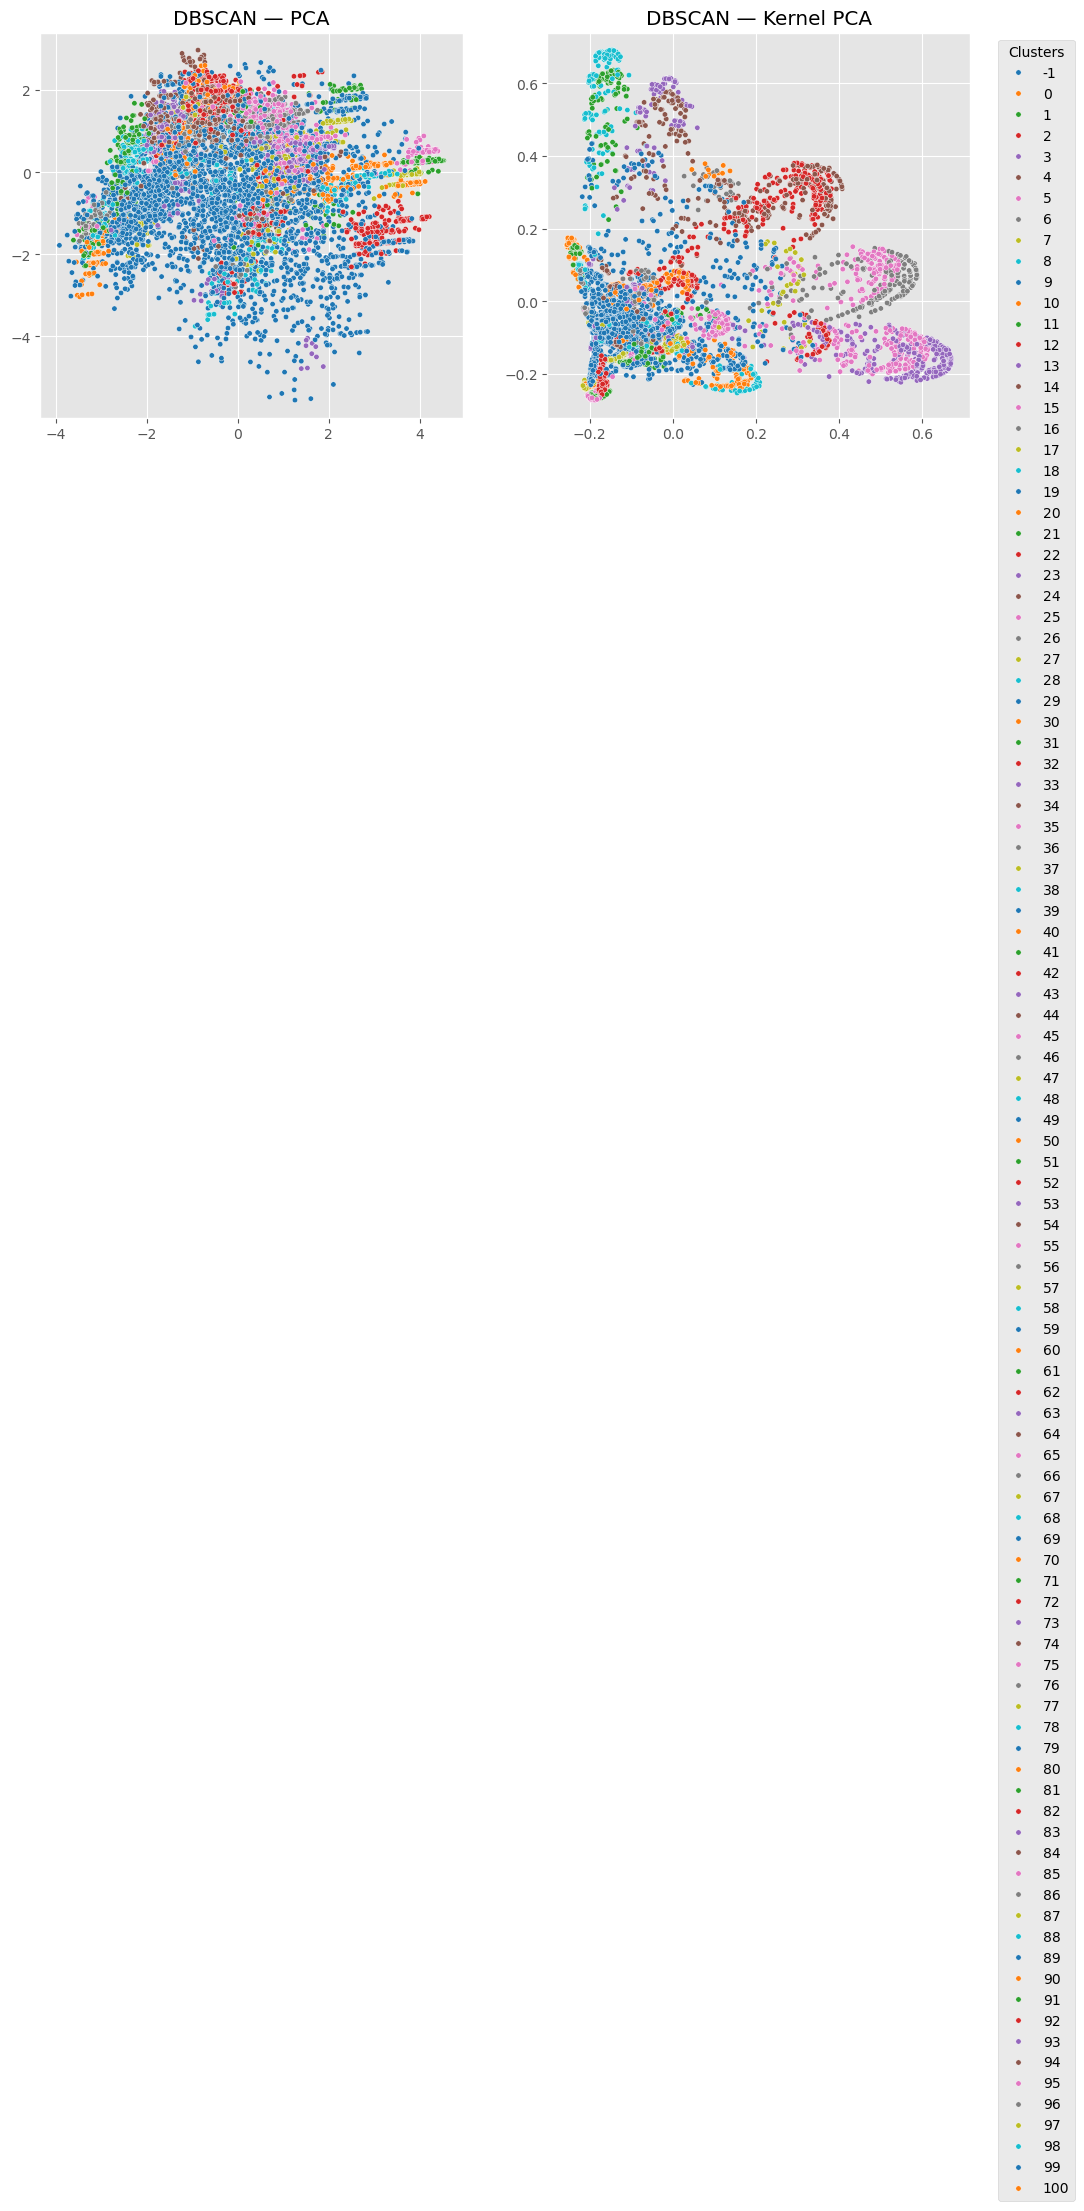

Pontos ruído (label -1): 2814 de 8068 (34.88%)


In [54]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.2, min_samples=10)
labels_db = dbscan.fit_predict(X_scaled)

train['Cluster_DBSCAN'] = labels_db

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_db, palette='tab10', s=15, legend=False)
plt.title('DBSCAN — PCA')

plt.subplot(1,2,2)
sns.scatterplot(x=X_kpca[:,0], y=X_kpca[:,1], hue=labels_db, palette='tab10', s=15)
plt.title('DBSCAN — Kernel PCA')
plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

n_noise = (labels_db == -1).sum()
print(f'Pontos ruído (label -1): {n_noise} de {len(labels_db)} ({n_noise/len(labels_db):.2%})')

## 7) Avaliação das métricas

In [55]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

km_sil = silhouette_score(X_scaled, train['Cluster_KMeans'])
km_db = davies_bouldin_score(X_scaled, train['Cluster_KMeans'])

print(f'K-Means → Silhouette: {km_sil:.3f}, Davies-Bouldin: {km_db:.3f}')

mask = train['Cluster_DBSCAN'] != -1
if mask.sum() > 1:
    db_sil = silhouette_score(X_scaled[mask], train.loc[mask,'Cluster_DBSCAN'])
    db_db = davies_bouldin_score(X_scaled[mask], train.loc[mask,'Cluster_DBSCAN'])
    print(f'DBSCAN → Silhouette (sem ruído): {db_sil:.3f}, Davies-Bouldin: {db_db:.3f}')
else:
    print('DBSCAN: poucos pontos sem ruído para calcular métricas.')

K-Means → Silhouette: 0.122, Davies-Bouldin: 2.595
DBSCAN → Silhouette (sem ruído): 0.431, Davies-Bouldin: 0.882


## 8) EDA por cluster — K-Means

,Age,Work_Experience,Family_Size
Cluster_KMeans,,,
0,25.95,2.53,3.78
1,40.71,2.55,3.08
2,43.40,3.11,2.45
3,63.74,1.69,2.65


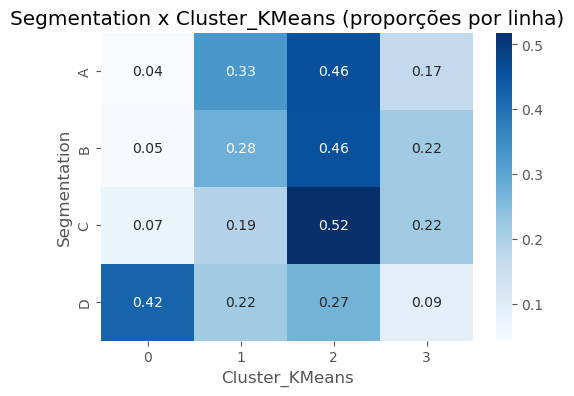

In [56]:
display(train.groupby('Cluster_KMeans')[['Age','Work_Experience','Family_Size']].mean().round(2))

ct = pd.crosstab(seg_true, train['Cluster_KMeans'], normalize='index')

plt.figure(figsize=(6,4))
sns.heatmap(ct, annot=True, fmt='.2f', cmap='Blues')
plt.title('Segmentation x Cluster_KMeans (proporções por linha)')
plt.show()

## 9) EDA por cluster — DBSCAN

,Age,Work_Experience,Family_Size
Cluster_DBSCAN,,,
-1,41.58,3.61,3.16
0,22.32,1.59,4.33
1,73.89,0.68,2.22
2,48.47,1.69,2.55
3,29.57,2.54,3.29
...,...,...,...
96,48.18,0.33,2.73
97,37.90,0.86,3.00
98,48.70,0.89,3.00


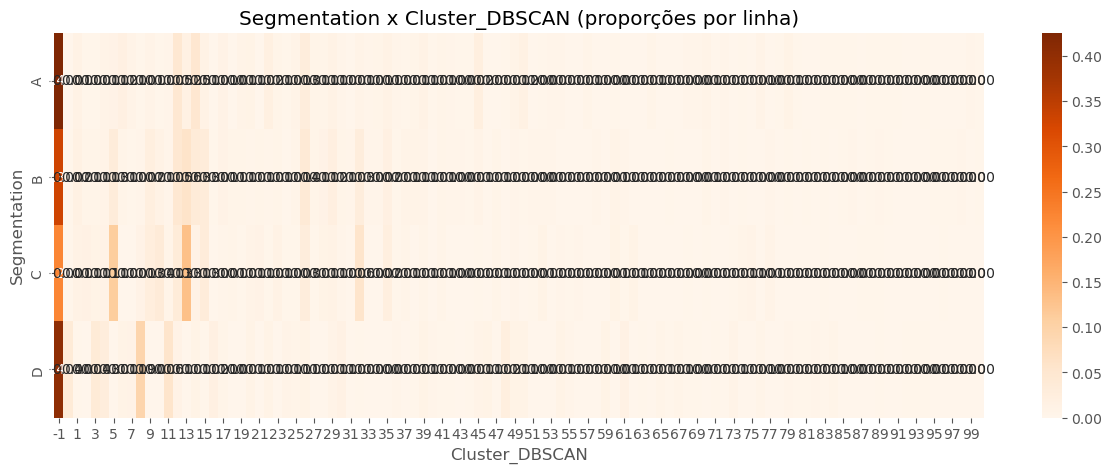

In [57]:
display(train.groupby('Cluster_DBSCAN')[['Age','Work_Experience','Family_Size']].mean().round(2))

ct_db = pd.crosstab(seg_true, train['Cluster_DBSCAN'], normalize='index')

plt.figure(figsize=(15,5))
sns.heatmap(ct_db, annot=True, fmt='.2f', cmap='Oranges')
plt.title('Segmentation x Cluster_DBSCAN (proporções por linha)')
plt.show()

## 10) Aplicar K-Means ao Test

In [58]:
test_df = test.copy()
if 'Segmentation' in test_df.columns:
    test_seg_true = test_df['Segmentation'].copy()
    test_df.drop(columns=['Segmentation'], inplace=True)
else:
    test_seg_true = None
test_df.drop(columns=['ID'], inplace=True)

for c in test_df.select_dtypes(include=['int64','float64']).columns:
    test_df[c].fillna(test_df[c].median(), inplace=True)
for c in test_df.select_dtypes(include=['object']).columns:
    test_df[c].fillna(test_df[c].mode()[0], inplace=True)

from sklearn.preprocessing import LabelEncoder
for c in ['Gender','Ever_Married','Graduated']:
    if c in test_df.columns:
        test_df[c] = LabelEncoder().fit_transform(test_df[c])

test_encoded = pd.get_dummies(test_df, columns=[col for col in ['Profession','Spending_Score','Var_1'] if col in test_df.columns], drop_first=True)

for col in df_encoded.columns:
    if col not in test_encoded.columns:
        test_encoded[col] = 0
test_encoded = test_encoded[df_encoded.columns]
X_test_scaled = scaler.transform(test_encoded)
test['Cluster_KMeans'] = kmeans.predict(X_test_scaled)
if test_seg_true is not None:
    display(pd.crosstab(test_seg_true, test['Cluster_KMeans'], normalize='index'))
else:
    print('Test não possui Segmentation — clusters atribuídos em test DataFrame.')
test.head()

Test não possui Segmentation — clusters atribuídos em test DataFrame.


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Cluster_KMeans
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,2
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,2
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,2
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,3
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,2
